# EMEPy Subpixel Techniques

### Circular Waveguide Radius Sweep

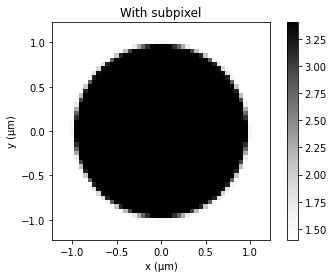

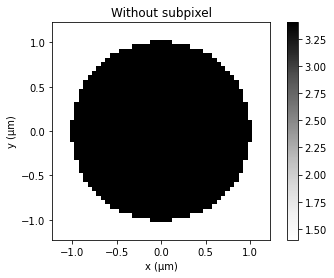

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from emepy.tools import circle_to_n
from emepy.fd import MSEMpy

def run(radius=1, subpixel=True, mesh=50):
    x = np.linspace(-1.25, 1.25, mesh)
    y = np.linspace(-1.25, 1.25, mesh)
    n = circle_to_n(
            (0, 0),
            radius,
            x,
            y,
            subpixel,
            3.4,
            1.4,
        )
    xx = ((x)[1:] + (x)[:-1]) / 2
    yy = ((y)[1:] + (y)[:-1]) / 2
    ms = MSEMpy(wl=1.55, n=n, x=xx, y=yy, num_modes=1)
    ms.solve()
    return ms.get_mode()

plt.figure()
run().plot_material()
plt.title("With subpixel")
plt.show()

plt.figure()
run(subpixel=False).plot_material()
plt.title("Without subpixel")
plt.show()

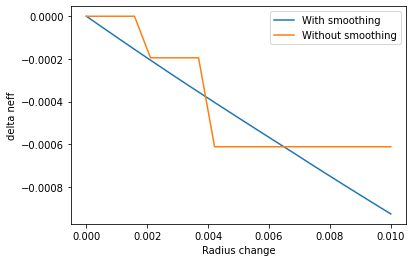

In [2]:
with_smoothing = []
without_smoothing = []
alt = np.linspace(0, 1e-2, 20)

for i, d in enumerate(alt):
    mode1 = run(1, True)
    mode2 = run(1 + d, True)
    mode3 = mode1 - mode2
    mode3.n = mode2.n - mode1.n
    with_smoothing.append(np.real(mode1.neff - mode2.neff))

    mode1 = run(1, False)
    mode2 = run(1 + d, False)
    mode3 = mode1 - mode2
    mode3.n = mode2.n - mode1.n
    without_smoothing.append(np.real(mode1.neff - mode2.neff))

plt.figure()
plt.plot(alt, with_smoothing, label="With smoothing")
plt.plot(alt, without_smoothing, label="Without smoothing")
plt.xlabel("Radius change")
plt.ylabel("delta neff")
plt.legend()
plt.show()

### Rectangular waveguide width sweep

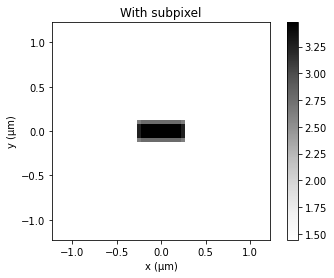

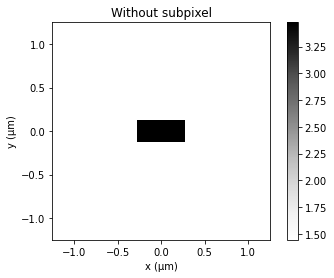

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from emepy.tools import rectangle_to_n
from emepy.fd import MSEMpy

def run(width=0.55, subpixel=True, mesh=50):
    x, y = (np.linspace(-1.25,1.25,mesh), np.linspace(-1.25,1.25,mesh))
    ms = MSEMpy(wl=1.55, width=width, thickness=0.22, subpixel=subpixel, x=x, y=y)
    ms.solve()
    return ms.get_mode()

plt.figure()
run(subpixel=True, mesh=50).plot_material()
plt.title("With subpixel")
plt.show()

plt.figure()
run(subpixel=False, mesh=49).plot_material()
plt.title("Without subpixel")
plt.show()

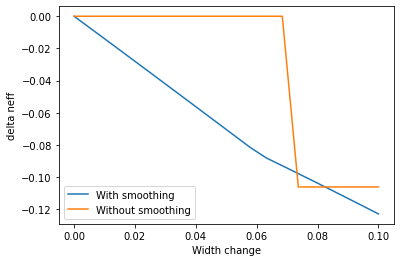

In [4]:
with_smoothing = []
without_smoothing = []
alt = np.linspace(0, 1e-1, 20)

for i, d in enumerate(alt):
    mode1 = run(0.5, True, mesh=50)
    mode2 = run(0.5 + d, True, mesh=50)
    mode3 = mode1 - mode2
    mode3.n = mode2.n - mode1.n
    with_smoothing.append(np.real(mode1.neff - mode2.neff))

    mode1 = run(0.5, False, mesh=49)
    mode2 = run(0.5 + d, False, mesh=49)
    mode3 = mode1 - mode2
    mode3.n = mode2.n - mode1.n
    without_smoothing.append(np.real(mode1.neff - mode2.neff))

plt.figure()
plt.plot(alt, with_smoothing, label="With smoothing")
plt.plot(alt, without_smoothing, label="Without smoothing")
plt.xlabel("Width change")
plt.ylabel("delta neff")
plt.legend()
plt.show()